# Cross-correlation

#Test nº 8

**Here we will simulate a two-body model which both prisms have the same dimension and equal values for the same magnetization direction, but different from the magnetic field. We will test the correlation for both positive and negative intervals for inclination and also by using the free and corrupted noised total field data.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from codes.prism import prism_tf
from codes.plot import draw_prism

In [2]:
n = 100 # points
x = np.linspace(-2000, 2000, n) # horizontal vectors
y = np.copy(x)
z = -100.
X, Y = np.meshgrid(x, y) # grid

In [16]:
model1 = [-500., -200., -500., -200., 200., 600., 0.962]
model2 = [200., 500., 200., 500., 200., 600., 0.796]
area1 = (model1[:4])
area2 = (model2[:4])

incf, decf = 56., 28. # field
incs, decs = 33., -66. # source

In [17]:
tf1 = prism_tf(X, Y, z, model1, incf, decf, incs, decs) # total-field anomaly
tf2 = prism_tf(X, Y, z, model2, incf, decf, incs, decs) # total-field anomaly

In [18]:
# Total field anomaly due the both prisms
tf = tf1 + tf2

In [19]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [20]:
print 'Total field by the first model:'
_ = analysis(tf1, 'nT') # analyzing

Total field by the first model:
Minimum:    -9.1821 nT
Maximum:    39.4813 nT
Mean value: 0.2610 nT
Variation:  48.6635 nT


In [21]:
print 'Total field by the second model:'
_ = analysis(tf2, 'nT') # analyzing

Total field by the second model:
Minimum:    -7.5912 nT
Maximum:    32.5986 nT
Mean value: 0.2189 nT
Variation:  40.1898 nT


In [22]:
print 'Total field anomaly:'
_ = analysis(tf, 'nT') # analyzing

Total field anomaly:
Minimum:    -10.4309 nT
Maximum:    39.0038 nT
Mean value: 0.4799 nT
Variation:  49.4347 nT


In [23]:
# Including noise
tf1_noise = addnoise(tf1, 1.0, 0.1)
tf2_noise = addnoise(tf2, 1.0, 0.1)

In [24]:
# All data
tf_noisy = tf1_noise + tf2_noise

In [25]:
print 'First noised anomaly:'
_ = analysis(tf1_noise, 'nT') # analyzing

First noised anomaly:
Minimum:    -8.2699 nT
Maximum:    40.4815 nT
Mean value: 1.2608 nT
Variation:  48.7513 nT


In [26]:
print 'Second noised anomaly:'
_ = analysis(tf2_noise, 'nT') # analyzing

Second noised anomaly:
Minimum:    -6.6397 nT
Maximum:    33.6285 nT
Mean value: 1.2193 nT
Variation:  40.2682 nT


In [27]:
print 'Noised total field:'
_ = analysis(tf_noisy, 'nT') # analyzing

Noised total field:
Minimum:    -8.6166 nT
Maximum:    41.0061 nT
Mean value: 2.4801 nT
Variation:  49.6227 nT


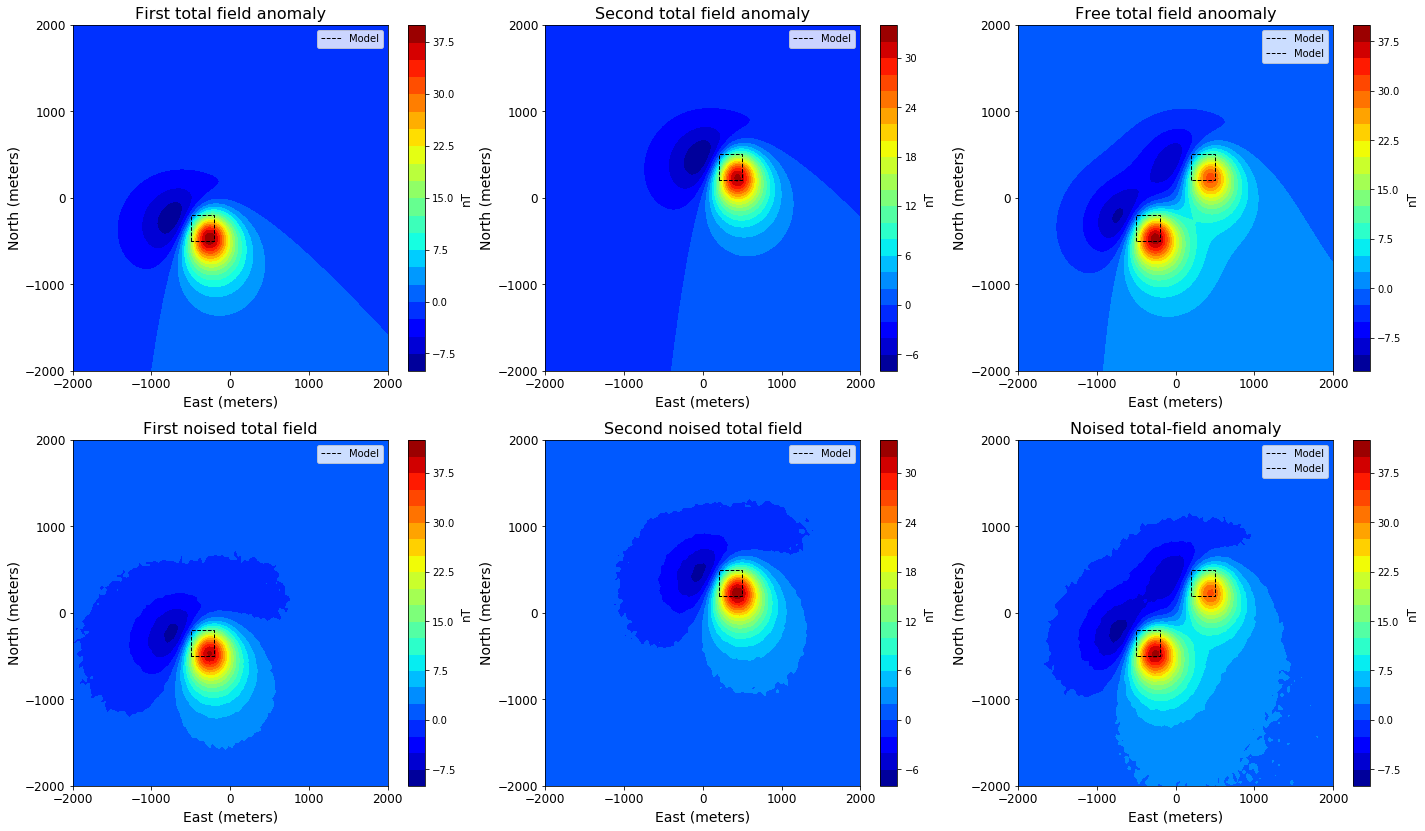

In [28]:
plt.close('all')
plt.figure(figsize=(24, 14))

plt.subplot(2, 3, 1)
plt.contourf(Y, X, tf1, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 2)
plt.contourf(Y, X, tf2, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second total field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 3)
plt.contourf(Y, X, tf, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Free total field anoomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 4)
plt.contourf(Y, X, tf1_noise, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(-1900., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('First noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 5)
plt.contourf(Y, X, tf2_noise, 20, cmap = plt.cm.jet)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Second noised total field', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.subplot(2, 3, 6)
plt.contourf(Y, X, tf_noisy, 20, cmap = plt.cm.jet)
draw_prism(area1, linewidth=1, label = 'Model', xy2ne=True)
draw_prism(area2, linewidth=1, label = 'Model', xy2ne=True)
#plt.text(1300., 1500., 'Figure (A)', fontsize = 12, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Noised total-field anomaly', fontsize = 16)
plt.xlabel('East (meters)', fontsize = 14)
plt.ylabel('North (meters)', fontsize = 14)
plt.xticks(np.linspace(x.min(), x.max(), 5), fontsize = 12)
plt.yticks(np.linspace(y.min(), y.max(), 5), fontsize = 12)
cb = plt.colorbar()
cb.set_label('nT', fontsize = 12)
plt.legend(loc = 'best')

plt.savefig('test08-fig01-anomaly.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

In [29]:
from codes.statistical import cccoef # correlation coefficient

In [30]:
from codes.filtering import reduction
from codes.derivative import totalgrad, zderiv

(A) Using the freeUsing a free total field anomaly

In [31]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values

Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [32]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [33]:
# Correlation for positive interval
for j in range(nd):
    for i in range(ni):    
        rtp_pos = reduction(x, y, tf, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

codes/auxiliars.py:182: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [34]:
# Correlation for negative interval
for i in range(ni):
    for j in range(nd):
        rtp_neg = reduction(x, y, tf, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)

In [35]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.1857
Maximum:    0.8275
Mean value: 0.5705
Variation:  0.6418

Correlacao (inclinacao negativa)
Minimum:    -0.8275
Maximum:    -0.1857
Mean value: -0.5710
Variation:  0.6418


In [36]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 34.0
Declination: -69.0

Minima correlacao:
Inclination: 10.0
Declination: -159.0


In [37]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 21.0

Minima correlacao:
Inclination: -34.0
Declination: 111.0


In [38]:
# True values
print 'True pair:', '(', incs, '/', decs, ')'

True pair: ( 33.0 / -66.0 )


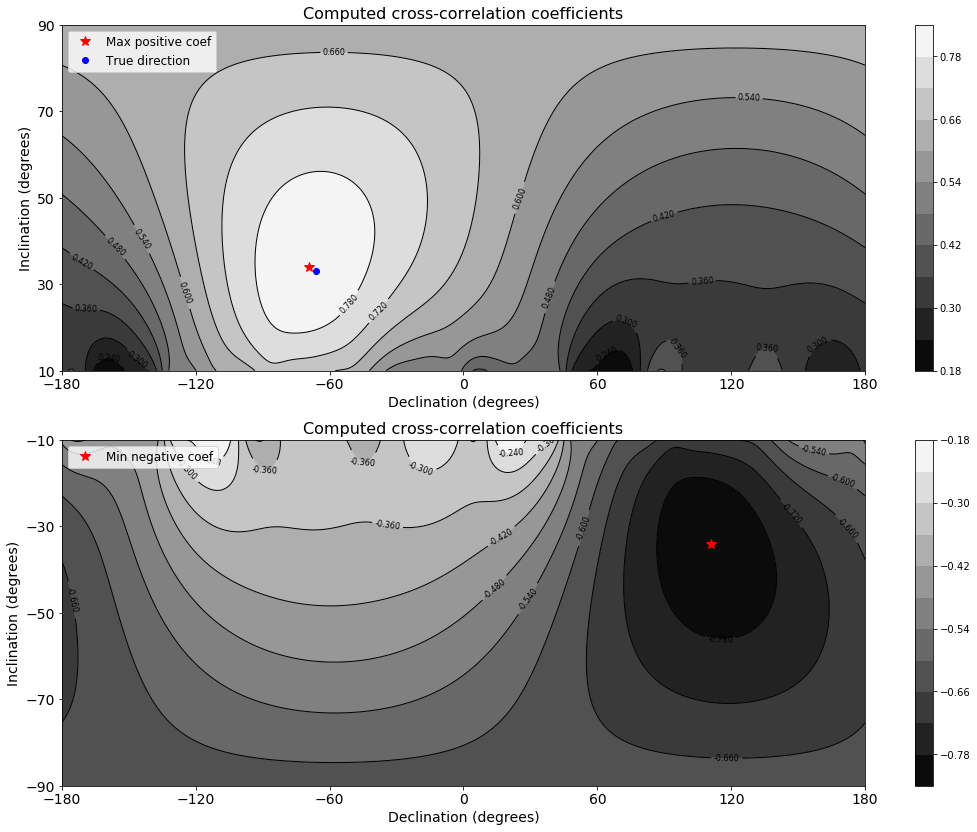

In [40]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(decs, incs, 'bo', markersize = 6, label = 'True direction')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.savefig('test08-fig02-1st_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()

(B) Using the noised total field anomaly

In [41]:
inc_pos = np.arange(10, 91, 1) # inclination positive values
inc_neg = np.arange(-90,-9, 1) # inclination negative values
dec = np.arange(-180., 181., 1.) # declination both values
#inc_pos = np.linspace(10., 91., 181)
#inc_neg = np.linspace(-90., -9., 181)
#dec = np.linspace(-180., 180., 721.)
Dec_pos, Inc_pos = np.meshgrid(dec, inc_pos) # positive grid
Dec_neg, Inc_neg = np.meshgrid(dec, inc_neg) # negative grid

In [42]:
ni, nd = inc_pos.size, dec.size # number of points
res_pos = np.zeros_like(Dec_pos) # zero matrix for positive
res_neg = np.zeros_like(Dec_neg) # zero matrix for negative

In [43]:
# Correlation for positive interval
for i in range(ni):   
    for j in range(nd):     
        rtp_pos = reduction(x, y, tf_noisy, incf, decf, inc_pos[i], dec[j])
        tga_pos = totalgrad(x, y, rtp_pos)
        vga_pos = zderiv(x, y, rtp_pos)
        res_pos[i,j] = cccoef(tga_pos, vga_pos)

In [44]:
# Correlation for negative interval
for i in range(ni): 
    for j in range(nd):
        rtp_neg = reduction(x, y, tf_noisy, incf, decf, inc_neg[i], dec[j])
        tga_neg = totalgrad(x, y, rtp_neg)
        vga_neg = zderiv(x, y, rtp_neg)
        res_neg[i,j] = cccoef(tga_neg, vga_neg)  

In [45]:
print 'Correlacao (inclinacao positiva)'
_ = analysis(res_pos)
print
print 'Correlacao (inclinacao negativa)'
_ = analysis(res_neg)

Correlacao (inclinacao positiva)
Minimum:    0.1685
Maximum:    0.7733
Mean value: 0.5422
Variation:  0.6049

Correlacao (inclinacao negativa)
Minimum:    -0.7733
Maximum:    -0.1685
Mean value: -0.5426
Variation:  0.6049


In [46]:
imax_pos, jmax_pos = np.where(res_pos == res_pos.max())
imin_pos, jmin_pos = np.where(res_pos == res_pos.min())
inc_pos_max = float(Inc_pos[imax_pos, jmax_pos])
dec_pos_max = float(Dec_pos[imax_pos, jmax_pos])

inc_pos_min = float(Inc_pos[imin_pos, jmin_pos])
dec_pos_min = float(Dec_pos[imin_pos, jmin_pos])
print 'Maxima correlacao:'
print 'Inclination:', inc_pos_max
print 'Declination:', dec_pos_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_pos_min
print 'Declination:', dec_pos_min

Maxima correlacao:
Inclination: 35.0
Declination: -69.0

Minima correlacao:
Inclination: 10.0
Declination: -159.0


In [47]:
imax_neg, jmax_neg = np.where(res_neg == res_neg.max())
imin_neg, jmin_neg = np.where(res_neg == res_neg.min())
inc_neg_max = float(Inc_neg[imax_neg, jmax_neg])
dec_neg_max = float(Dec_neg[imax_neg, jmax_neg])

inc_neg_min =float(Inc_neg[imin_neg, jmin_neg])
dec_neg_min = float(Dec_neg[imin_neg, jmin_neg])
print 'Maxima correlacao:'
print 'Inclination:', inc_neg_max
print 'Declination:', dec_neg_max
print
print 'Minima correlacao:'
print 'Inclination:', inc_neg_min
print 'Declination:', dec_neg_min

Maxima correlacao:
Inclination: -10.0
Declination: 21.0

Minima correlacao:
Inclination: -35.0
Declination: 111.0


In [48]:
# True values
print 'True inclination:', incs
print 'True declination:', decs

True inclination: 33.0
True declination: -66.0


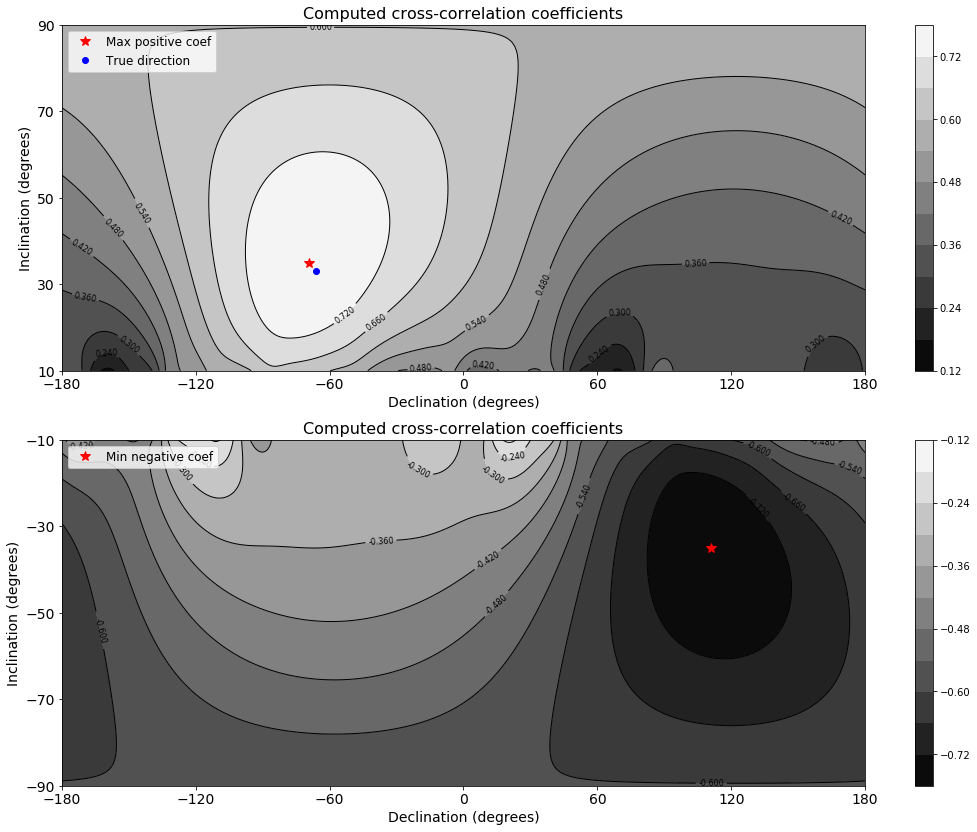

In [49]:
# Plotting the results
plt.close('all')
plt.figure(figsize=(18, 14))

plt.subplot(2,1,1)
plot1 = plt.contour(Dec_pos, Inc_pos, res_pos, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_pos, Inc_pos, res_pos, 10, cmap = plt.cm.gray)
plt.plot(dec_pos_max, inc_pos_max, 'r*', markersize = 10, label = 'Max positive coef')
plt.plot(decs, incs, 'bo', markersize = 6, label = 'True direction')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(10., 91., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

plt.subplot(2,1,2)
plot2 = plt.contour(Dec_neg, Inc_neg, res_neg, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec_neg, Inc_neg, res_neg, 10, cmap = plt.cm.gray)
plt.plot(dec_neg_min, inc_neg_min, 'r*', markersize = 10, label = 'Min negative coef')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Computed cross-correlation coefficients', fontsize = 16)
plt.xlabel('Declination (degrees)', fontsize = 14)
plt.ylabel('Inclination (degrees)', fontsize = 14)
plt.xticks(np.arange(-180., 181., 60),fontsize = 14)
plt.yticks(np.arange(-90., -9., 20), fontsize = 14)
cb = plt.colorbar()
plt.legend(loc = 'upper left', fontsize = 'large')

#plt.savefig('test08-fig03-2nd_correlation.png', dpi = 300, facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()